<img src = 'http://www.tvhorizonte.com.br/content/uploads/Logo-PUC-Minas-Sobre.png' height="150" width="200">
<p><b><font size = 5 face = 'verdana'> TAREFA AVALIATIVA 2 - REGRESSÃO</font></b></p>

<p><font size = 3 face = 'verdana'>Trabalho apresentado à conclusão do curso de MÉTODO ESTATÍSTICO do curso de Pós-Graduação em Inteligência Artificial, PUC Minas, como requisito parcial de avaliação. </font></b></p>
<p><font size = 3 face = 'verdana'><b>PROFESSORA:</b> JESSICA DA ASSUNÇÃO ALMEIDA DE LIMA<br> 
<b>ALUNO:</b> OSEMAR DA SILVA XAVIER<br>
<b>MATRÍCULA:</b> 1418586</font></p>
<p><font size = 3 face = 'verdana'>

1. Escolha uma variável independente e uma variável dependente e faça o ajuste de uma regressão linear simples com os dados abaixo.<br>
<b><span style="color:blue">https://www.kaggle.com/vivinbarath/simple-linear-regression-for-salary-data/data</span></b>

2. Escolha duas ou mais variáveis independentes e uma variável dependente e faça o ajuste de uma regressão linear múltipla com os dados abaixo.<br>
<b><span style="color:blue">https://www.kaggle.com/divan0/multiple-linear-regression/data</span></b>

3. Escolha duas ou mais variáveis independentes e uma variável dependente binária e faça o ajuste de uma regressão logística  com os dados abaixo.<br>
<b><span style="color:blue">http://archive.ics.uci.edu/ml/datasets/Fertility</span></b>


In [399]:
# CARREGANDO O NUMPY E PANDAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as sm
from sklearn import linear_model
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
import seaborn as sns

In [319]:
# CRIAÇÃO DA VARIÁVEL salary_df COM OS DADOS DO ARQUIVO .CSV
salary_df = pd.read_csv('G:\Meu Drive\Python Scripts\Cursos\PUC_Minas\ME\Atividade2\Salary_Data.csv')

# CRIAÇÃO DA VARIÁVEL house_df COM OS DADOS DO ARQUIVO .CSV
house_df = pd.read_csv('G:\Meu Drive\Python Scripts\Cursos\PUC_Minas\ME\Atividade2\kc_house_data.csv')

# CRIAÇÃO DA VARIÁVEL fertility_df COM OS DADOS DO ARQUIVO .CSV
fertility_df = pd.read_csv('G:/Meu Drive/Python Scripts/Cursos/PUC_Minas/ME/Atividade2/fertility_Diagnosis.txt', header=None)

<p><font size = 4 face = 'verdana'>
<b>TAREFA AVALIATIVA - QUESTÃO NÚMERO 1: </b></font></p>

Escolha uma variável independente e uma variável dependente e faça o ajuste de uma regressão linear simples com os dados abaixo.<br>
<b><span style="color:blue">https://www.kaggle.com/vivinbarath/simple-linear-regression-for-salary-data/data</span></b>

<li>Quanto ao conjunto de dados Salary_Data.csv temos duas colunas disponíveis “Anos de experiência” e “Salário” de 30 funcionários de uma empresa. Então, neste exemplo, a ideia é treinar um modelo de Regressão Linear Simples para entender a correlação entre o número de anos de experiência de cada funcionário e seu respectivo salário. Depois que o modelo for treinado, será possível fazer algumas previsões de amostra.
</li>

In [320]:
# TRAZENDO AS 10 PRIMEIRAS LINHAS DO DATASET CRIADO.
salary_df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<p><b><font size = 5 face = 'verdana'> 1.a - ANALISE INICIAL</font></b></p>

In [321]:
# UTILIZANDO COLUMNS PARA TRAZER O NOME DE TODAS AS COLUNAS DO DATAFRAME
salary_df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [322]:
# UTILIZANDO SHAPE PARA TRAZER O TOTAL DE LINHAS E COLUNAS
# NO TOTAL TEMOS 30 LINHAS E 2 COLUNAS
salary_df.shape

(30, 2)

<AxesSubplot:>

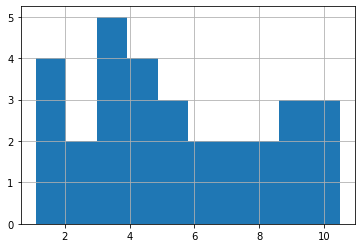

In [323]:
salary_df['YearsExperience'].hist()

<AxesSubplot:>

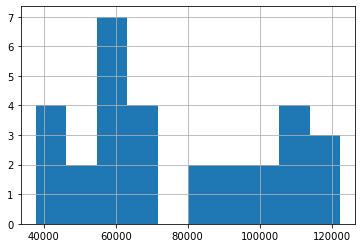

In [324]:
salary_df['Salary'].hist()

In [325]:
# Usei describe() calcular alguns dados estatísticos 
salary_df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [326]:
salary_df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


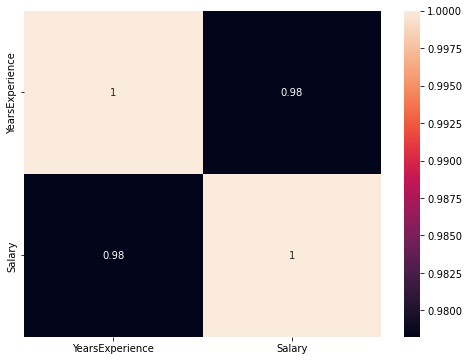

In [327]:
corr_df = salary_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_df, annot = True)
plt.show()

In [328]:
modelo_salario = sm.ols(formula = 'Salary ~ YearsExperience', data = salary_df).fit()
print(modelo_salario.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           1.14e-20
Time:                        22:21:51   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     

<p><b><font size = 5 face = 'verdana'>1.b - ESTIMATIVA DO SALÁRIO COM REGRESSÃO LINEAR</font></b></p>

In [329]:
# Extrai a coluna YearsExperience e Salary e atribuí às variáveis ​​X e y, respectivamente.
X = salary_df['YearsExperience']
y = salary_df['Salary']

In [330]:
# Separando 30% de todo o conjunto de dados como o conjunto de teste e 
# atribuindo o conjunto de treinamento e o conjunto de teste em quatro variáveis, respectivamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [331]:
# Use a função de RESHAPE Numpy transformar o conjunto de treinamento 
# de uma série unidimensional em uma matriz bidimensional. 
X_train = np.array(X_train).reshape((len(X_train),1))
y_train = np.array(y_train).reshape((len(y_train),1))

X_test = np.array(X_test).reshape(len(X_test), 1)
y_test = np.array(y_test).reshape(len(y_test), 1)

In [332]:
# Treinando o modelo de regressão linear.
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

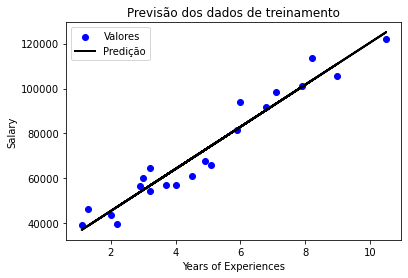

In [333]:
# Usei o Matplotlib para criar um gráfico para visualizar os resultados preditos do modelo. 
y_train_pred = model.predict(X_train)

plt.figure()
plt.scatter(X_train, y_train, color='blue', label="Valores")
plt.plot(X_train, y_train_pred, color='black', linewidth=2, label="Predição")
plt.xlabel("Years of Experiences")
plt.ylabel("Salary")
plt.title('Previsão dos dados de treinamento')
plt.legend()
plt.show()

In [334]:
# Conforme o modelo se um funcionário trabalhar durante 5 anos 
# o valor do salário será de aproximadamente 73578.69
model.predict([[5]])

array([[73578.69777217]])

<p><font size = 4 face = 'verdana'>
<b>TAREFA AVALIATIVA - QUESTÃO NÚMERO 2: </b></font></p>

Escolha duas ou mais variáveis independentes e uma variável dependente e faça o ajuste de uma regressão linear múltipla com os dados abaixo.<br>
<b><span style="color:blue">https://www.kaggle.com/divan0/multiple-linear-regression/data</span></b>

<li>Quanto ao conjunto de dados kc_house_data.csv contém preços de venda de casas para King County, que inclui Seattle. Inclui casas vendidas entre maio de 2014 e maio de 2015. Num total de 10 linhas e 21 colunas. 
</li>



In [335]:
# TRAZENDO AS 10 PRIMEIRAS LINHAS DO DATASET CRIADO.
house_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


<p><b><font size = 5 face = 'verdana'> 2.a - ANALISE INICIAL</font></b></p>

In [336]:
# UTILIZANDO COLUMNS PARA TRAZER O NOME DE TODAS AS COLUNAS DO DATAFRAME
house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [337]:
# UTILIZANDO SHAPE PARA TRAZER O TOTAL DE LINHAS E COLUNAS
# NO TOTAL TEMOS 21613 LINHAS E 21 COLUNAS
house_df.shape

(21613, 21)

In [338]:
# Verificando se exitem linhas vazias 
house_df.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [339]:
# Analisando o tipo de variáveis do dataframe
house_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [340]:
house_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<AxesSubplot:xlabel='long', ylabel='lat'>

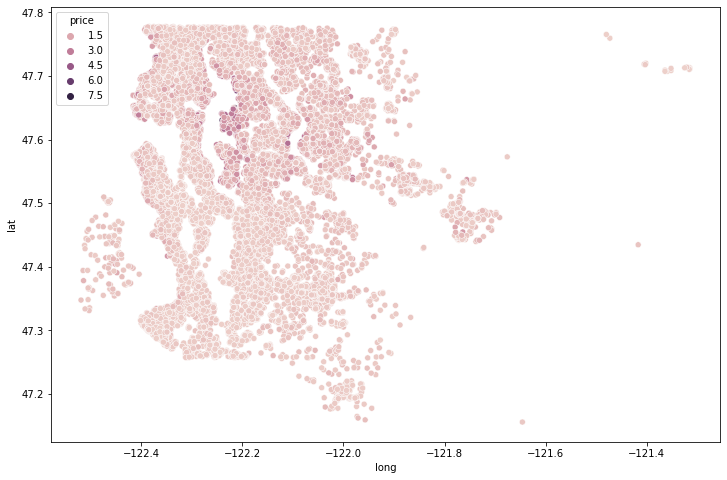

In [341]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=house_df, hue='price')

<AxesSubplot:xlabel='price', ylabel='Count'>

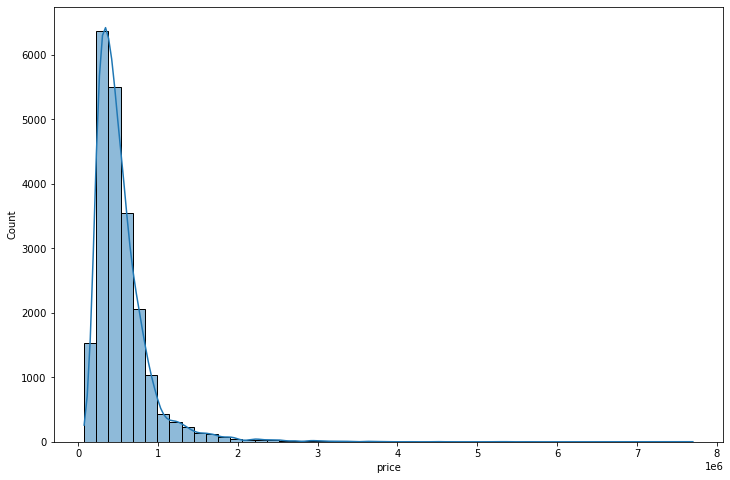

In [342]:
plt.figure(figsize=(12,8))
sns.histplot(house_df['price'], kde= True, bins=50)

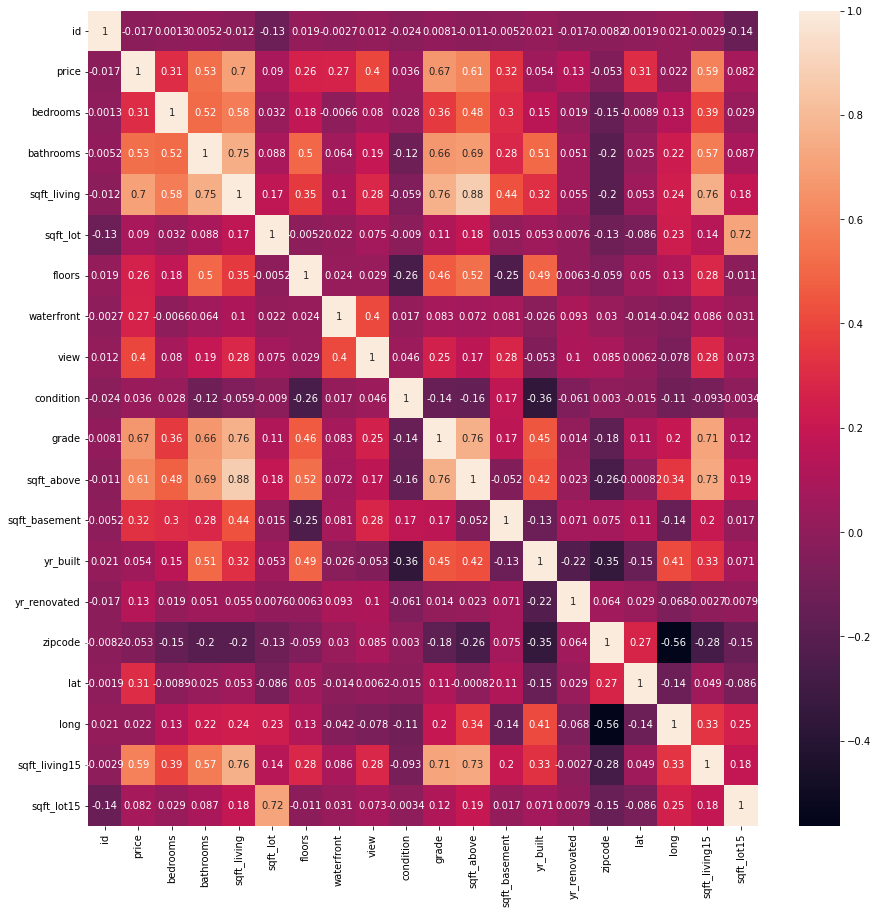

In [343]:
corr_df = house_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_df, annot = True)
plt.show()

In [344]:
# UTILIZANDO SHAPE PARA TRAZER O TOTAL DE LINHAS E COLUNAS
# NO TOTAL TEMOS 30 LINHAS E 2 COLUNAS
house_df.shape

(21613, 21)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

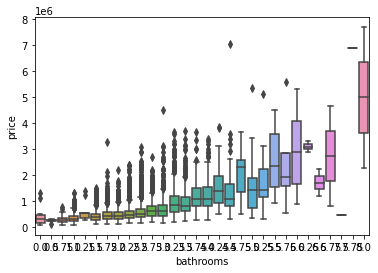

In [345]:
# Usei a função boxplot na biblioteca seaborn para analisar 
# a quantidade de banheiros e sua relação com o preço
sns.boxplot(x="bathrooms", y="price", data=house_df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

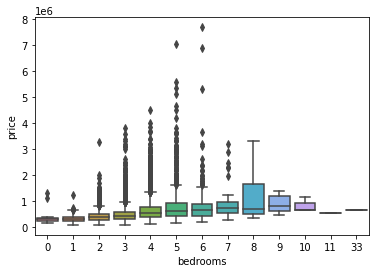

In [346]:
# Usei a função boxplot na biblioteca seaborn para analisar 
# a quantidade de quartos e sua relação com o preço
sns.boxplot(x="bedrooms", y="price", data=house_df)

Podemos perceber que as residências possuem mais casas com 3 e 4 quartos do que as demais, o que nos leva a perceber que existem vários outros atributos que valorizam a casa e não apenas quartos e banheiros.

In [347]:
# Usei o método corr() para encontrar o recurso diferente do preço 
# que está mais correlacionado com o preço
house_df.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

<p><b><font size = 5 face = 'verdana'>2.b - ESTIMATIVA DO VALOR DO IMÓVEL COM REGRESSÃO LINEAR</font></b></p>

In [348]:
df = house_df
X = df[['bedrooms','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
       'grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15']].values
y = df['price'].values

In [349]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [350]:
lr = LinearRegression()

In [351]:
lr.fit(X_train,y_train)

LinearRegression()

In [352]:
pred_lr = lr.predict(X_test)

In [353]:
score_lr = lr.score(X_train,y_train)
print(score_lr)

0.6037060351773105


In [354]:
lr.coef_[0]

-16504.188458418103

In [355]:
lr.intercept_

-692007.9820320702

In [356]:
mae_lr = mean_absolute_error(y_test,pred_lr)
mse_lr = mean_squared_error(y_test,pred_lr)
rmse_lr = np.sqrt(mse_lr)

print('Mae_lr: ',mae_lr)
print('Mse_lr: ',mse_lr)
print('Rmse_lr: ',rmse_lr)

Mae_lr:  152838.11248940052
Mse_lr:  53187007818.69321
Rmse_lr:  230623.08604884552


In [357]:
preco_lr = df['price']
predict_lr = pd.Series(pred_lr)
error_lr = preco_lr-predict_lr
data_lr = {'Price':preco_lr,'Predictions':predict_lr,'Error':error_lr}
data_prev_lr = pd.DataFrame(data_lr)
data_prev_lr.head()

,Price,Predictions,Error
0,221900.0,384260.712892,-162360.712892
1,538000.0,200149.306280,337850.693720
2,180000.0,656015.361663,-476015.361663
3,604000.0,770591.312979,-166591.312979
4,510000.0,416366.208160,93633.791840


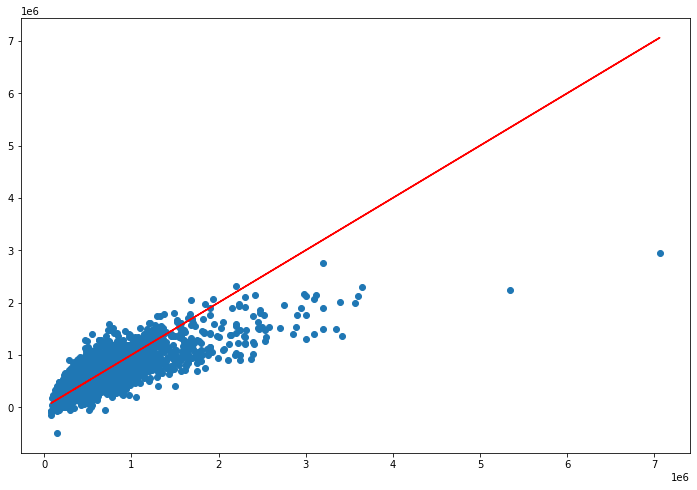

In [358]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,pred_lr)
plt.plot(y_test,y_test,color='red')

<p><font size = 4 face = 'verdana'>
<b>TAREFA AVALIATIVA - QUESTÃO NÚMERO 3: </b></font></p>

Escolha duas ou mais variáveis independentes e uma variável dependente binária e faça o ajuste de uma regressão logística  com os dados abaixo.<br>
<b><span style="color:blue">http://archive.ics.uci.edu/ml/datasets/Fertility</span></b>

<p><font size = 3 face = 'verdana'>Cem voluntários fornecem uma amostra de sémen analisada de acordo com os critérios da OMS 2010. A concentração de esperma está relacionada com dados sociodemográficos, fatores ambientais, estado de saúde, e hábitos de vida
</font></p>
Informação de Atributos:

<li>estacao -> Época em que a análise foi realizada. 1) Inverno, 2) Primavera, 3) Verão, 4) Outono. (-1, -0.33, 0.33, 1)</li>
<li>idade -> Idade na altura da análise. 18-36 (0, 1)</li>
<li>doencas_infantis -> Doenças infantis (ou seja, varíola, sarampo, papeira, poliomielite) 1) sim, 2) não (0, 1)</li>
<li>acidente_trauma -> Acidente ou trauma grave 1) sim, 2) não (0, 1)</li>
<li>interv_cirurgica ->  Intervenção cirúrgica 1) sim, 2) não (0, 1)</li>
<li>febre_ult_ano -> febres altas no último ano 1) há menos de três meses, 2) há mais de três meses, 3) no. (-1, 0, 1)</li>
<li>freq_alcool -> Frequência do consumo de álcool 1) várias vezes por dia, 2) todos os dias, 3) várias vezes por semana, 4) uma vez por semana, 5) quase nunca ou nunca (0, 1)</li>
<li>fumante -> hábito de fumar 1) nunca, 2) ocasionalmente 3) diariamente. (-1, 0, 1)</li>
<li>horas_sentados_dia -> Número de horas sentadas por dia ene-16 (0, 1)</li>
<li>classe -> Produção: Diagnóstico normal (N), alterado (O)</li> 



<p><b><font size = 5 face = 'verdana'> 2.a - ANALISE INICIAL</font></b></p>

In [359]:
# UTILIZANDO COLUMNS PARA TRAZER O NOME DE TODAS AS COLUNAS DO DATAFRAME
fertility_df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [360]:
# UTILIZANDO SHAPE PARA TRAZER O TOTAL DE LINHAS E COLUNAS
# NO TOTAL TEMOS 100 LINHAS E 10 COLUNAS
fertility_df.shape

(100, 10)

In [361]:
# TRAZENDO AS 10 PRIMEIRAS LINHAS DO DATASET CRIADO.
fertility_df.head(10)

,0,1,2,3,4,5,6,7,8,9
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
5,-0.33,0.67,1,0,1,0,0.8,0,0.50,N
6,-0.33,0.67,0,0,0,-1,0.8,-1,0.44,N
7,-0.33,1.00,1,1,1,0,0.6,-1,0.38,N
8,1.00,0.64,0,0,1,0,0.8,-1,0.25,N
9,1.00,0.61,1,0,0,0,1.0,-1,0.25,N


In [362]:
# FIZ A ALTERAÇÃO DOS NOMES DOS CAMPOS CONFORME OS ATRIBUTOS INFORMADOS
fertility_df.rename({0:'estacao',
            1:'idade',
            2:'doencas_infantis',
            3:'acidente_trauma',
            4:'interv_cirurgica',
            5:'febre_ult_ano',
            6:'freq_alcool',
            7:'fumante',
            8:'horas_sentados_dia',
            9:'classe'}, axis = 1, inplace= True )

fertility_df.columns


Index(['estacao', 'idade', 'doencas_infantis', 'acidente_trauma',
       'interv_cirurgica', 'febre_ult_ano', 'freq_alcool', 'fumante',
       'horas_sentados_dia', 'classe'],
      dtype='object')

In [363]:
fertility_df.describe().T

,count,mean,std,min,25%,50%,75%,max
estacao,100.0,-0.0789,0.796725,-1.00,-1.00,-0.33,1.00,1.0
idade,100.0,0.6690,0.121319,0.50,0.56,0.67,0.75,1.0
doencas_infantis,100.0,0.8700,0.337998,0.00,1.00,1.00,1.00,1.0
acidente_trauma,100.0,0.4400,0.498888,0.00,0.00,0.00,1.00,1.0
interv_cirurgica,100.0,0.5100,0.502418,0.00,0.00,1.00,1.00,1.0
febre_ult_ano,100.0,0.1900,0.580752,-1.00,0.00,0.00,1.00,1.0
freq_alcool,100.0,0.8320,0.167501,0.20,0.80,0.80,1.00,1.0
fumante,100.0,-0.3500,0.808728,-1.00,-1.00,-1.00,0.00,1.0
horas_sentados_dia,100.0,0.4068,0.186395,0.06,0.25,0.38,0.50,1.0


In [364]:
# ABAIXO CONTABILIZO O TOTAL DE INSTÂNCIAS E FEATURES DO NOSSO DATASET
print("{} instâncias com {} features\n".format(*fertility_df.shape))

# TOTAL POR CLASSE
print(fertility_df.groupby('classe')['classe'].count())

100 instâncias com 10 features

classe
N    88
O    12
Name: classe, dtype: int64


<AxesSubplot:xlabel='estacao', ylabel='count'>

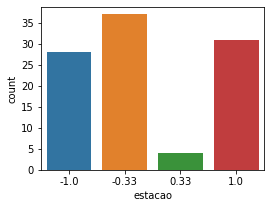

In [365]:
plt.figure(figsize=(4,3))
sns.countplot(data = fertility_df, x = 'estacao')

<AxesSubplot:xlabel='doencas_infantis', ylabel='count'>

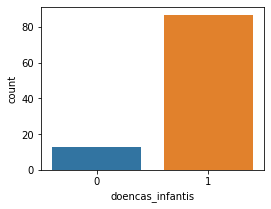

In [366]:
plt.figure(figsize=(4,3))
sns.countplot(data = fertility_df, x = 'doencas_infantis')

<AxesSubplot:xlabel='freq_alcool', ylabel='count'>

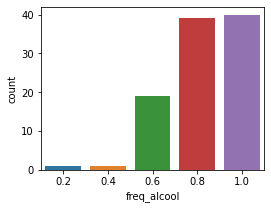

In [367]:
plt.figure(figsize=(4,3))
sns.countplot(data = fertility_df, x = 'freq_alcool')

Os gráficos nos mostram que a maioria das análises foi realizada no inverno, primavera e outono. Muito poucos foram realizadas no verão. Muitos participantes não tiveram nenhum tipo de doença na infância, enquanto 18 relataram que sim. É possível perceber que a maioria dos participantes consomem bebida alcóolica.

In [382]:
ord_enc = OrdinalEncoder()

In [388]:
fertility_df['estacao']=ord_enc.fit_transform(fertility_df[['estacao']])
fertility_df['doencas_infantis']=ord_enc.fit_transform(fertility_df[['doencas_infantis']])
fertility_df['acidente_trauma']=ord_enc.fit_transform(fertility_df[['acidente_trauma']])
fertility_df['freq_alcool']=ord_enc.fit_transform(fertility_df[['freq_alcool']])
fertility_df['fumante']=ord_enc.fit_transform(fertility_df[['fumante']])
fertility_df['classe']=ord_enc.fit_transform(fertility_df[['classe']])

In [389]:
x=fertility_df[['estacao', 'idade', 'doencas_infantis', 'acidente_trauma',
       'interv_cirurgica', 'febre_ult_ano', 'freq_alcool', 'fumante',
       'horas_sentados_dia']]

In [391]:
y=fertility_df['classe']

In [393]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [395]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=42 )

In [397]:
classifier.fit(X_train,y_train)


LogisticRegression(random_state=42)

In [400]:
y_pred = classifier.predict(X_test)


In [401]:
accuracy_score(y_pred,y_test)

0.92